# Guia da Camada de Rede
### A camada de rede serve para o cliente pedir uma requisição de rota entre dois pontos (Alice e Bob) e que seja atendida por uma rota escolhida e adequada.

#### IMPORTANDO AS DEPENDÊNCIAS
##### Este documento tem como objetivo demostrar a execução da camada de rede, além de suas funcionalidades. 

In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger
Logger.activate(Logger)

#### Ao importar as dependências, vamos instaciar a rede com 20 qubits em cada host e 10 pares EPRS em cada canal da topologia. 

2024-06-30 21:29:25,193: Qubit 0 adicionado à memória do Host 0.
2024-06-30 21:29:25,194: Qubit 0 criado com fidelidade inicial 0.21376876866166505 e adicionado à memória do Host 0.
2024-06-30 21:29:25,195: Qubit 1 adicionado à memória do Host 0.
2024-06-30 21:29:25,195: Qubit 1 criado com fidelidade inicial 0.056176274728075626 e adicionado à memória do Host 0.
2024-06-30 21:29:25,196: Qubit 2 adicionado à memória do Host 0.
2024-06-30 21:29:25,196: Qubit 2 criado com fidelidade inicial 0.7049245560420958 e adicionado à memória do Host 0.
2024-06-30 21:29:25,197: Qubit 3 adicionado à memória do Host 0.
2024-06-30 21:29:25,197: Qubit 3 criado com fidelidade inicial 0.09637170123234828 e adicionado à memória do Host 0.
2024-06-30 21:29:25,198: Qubit 4 adicionado à memória do Host 0.
2024-06-30 21:29:25,198: Qubit 4 criado com fidelidade inicial 0.8317834688382079 e adicionado à memória do Host 0.
2024-06-30 21:29:25,199: Qubit 5 adicionado à memória do Host 0.
2024-06-30 21:29:25,199: Q

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


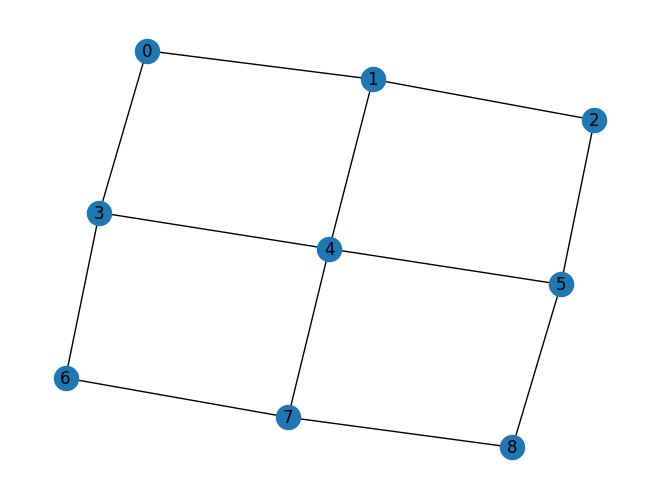

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 3,3)
rede.draw()

In [3]:
alice = rede.get_host(6)
bob = rede.get_host(1)

##### Nesse sentido, primeiramente precisa-se escolher a melhor rota e seus critérios são dados pela rota com menor caminho. Para verificar isso usaremos a função short_route_valid, que irá entregar uma rota válida entre Alice e Bob. 

In [4]:
rede.networklayer.short_route_valid(6,1)

2024-06-30 21:29:26,097: Rota válida encontrada: [6, 3, 0, 1]


[6, 3, 0, 1]

##### Para a rota ser válida, precisa-se verificar se cada canal da rede tem peloo menos 1 par EPR e se nó tem 2 qubits. Através dessas funções podemos verificar.

In [5]:
rede.networklayer.verify_channels()
rede.networklayer.verify_nodes()

2024-06-30 21:29:26,110: Há pelo menos 1 par EPR nesses canais
2024-06-30 21:29:26,111: Todos os nós possuem pelo menos 2 qubits


True

##### Dessa forma, vamos realizar o entanglement swapping entre Alice e Bob, o que permite criar um par de qubits emaranhados entre dois nós que não têm uma conexão direta de emaranhamento, utilizando pares intermediários.

In [6]:
rede.networklayer.entanglement_swapping(6, 3, 0, 1)

2024-06-30 21:29:26,122: Par EPR <quantumnet.objects.epr.Epr object at 0x0000026B4CECD050> adicionado ao canal (6, 0).
2024-06-30 21:29:26,123: Par EPR <quantumnet.objects.epr.Epr object at 0x0000026B4D530110> removido do canal (6, 3).
2024-06-30 21:29:26,125: Par EPR <quantumnet.objects.epr.Epr object at 0x0000026B4D531E90> removido do canal (3, 0).
2024-06-30 21:29:26,125: Par EPR <quantumnet.objects.epr.Epr object at 0x0000026B5C520DD0> adicionado ao canal (6, 1).
2024-06-30 21:29:26,126: Par EPR <quantumnet.objects.epr.Epr object at 0x0000026B4CECD050> removido do canal (6, 0).
2024-06-30 21:29:26,127: Par EPR <quantumnet.objects.epr.Epr object at 0x0000026B4D522D10> removido do canal (0, 1).
2024-06-30 21:29:26,128: Sucesso do Entanglement Swapping no 6 para 1 através do 3 e 0


True